<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Classification-versus-regression" data-toc-modified-id="Classification-versus-regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Classification versus regression</a></span><ul class="toc-item"><li><span><a href="#Classification-or-regression?" data-toc-modified-id="Classification-or-regression?-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Classification or regression?</a></span></li></ul></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Get-the-data:-the-diabetes-data-set" data-toc-modified-id="Get-the-data:-the-diabetes-data-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data: the diabetes data set</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Create-training-and-test-sets" data-toc-modified-id="Create-training-and-test-sets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create training and test sets</a></span></li><li><span><a href="#Training-a-classifier" data-toc-modified-id="Training-a-classifier-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training a classifier</a></span></li><li><span><a href="#Evaluating-models-/-performance-measures" data-toc-modified-id="Evaluating-models-/-performance-measures-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluating models / performance measures</a></span><ul class="toc-item"><li><span><a href="#Accuracy-and-different-sorts-of-errors" data-toc-modified-id="Accuracy-and-different-sorts-of-errors-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Accuracy and different sorts of errors</a></span></li><li><span><a href="#Validation-set-and-model-selection" data-toc-modified-id="Validation-set-and-model-selection-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Validation set and model selection</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Precision,-recall-and-specificity" data-toc-modified-id="Precision,-recall-and-specificity-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Precision, recall and specificity</a></span><ul class="toc-item"><li><span><a href="#Connection-to-the-confusion-matrix" data-toc-modified-id="Connection-to-the-confusion-matrix-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>Connection to the confusion matrix</a></span></li><li><span><a href="#In-scikit-learn" data-toc-modified-id="In-scikit-learn-7.5.2"><span class="toc-item-num">7.5.2&nbsp;&nbsp;</span>In scikit-learn</a></span></li></ul></li><li><span><a href="#$F_1$-score" data-toc-modified-id="$F_1$-score-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>$F_1$ score</a></span></li><li><span><a href="#Precision/recall-tradeoff" data-toc-modified-id="Precision/recall-tradeoff-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Precision/recall tradeoff</a></span></li><li><span><a href="#Comparing-classifiers" data-toc-modified-id="Comparing-classifiers-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Comparing classifiers</a></span></li></ul></li><li><span><a href="#Final-test-of-classifiers" data-toc-modified-id="Final-test-of-classifiers-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Final test of classifiers</a></span></li><li><span><a href="#Summary-so-far" data-toc-modified-id="Summary-so-far-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary so far</a></span></li><li><span><a href="#Next" data-toc-modified-id="Next-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Next</a></span></li></ul></div>

A.S. Lundervold, v. 270921

This notebook is partly based on `https://github.com/alu042/DAT158ML/blob/master/notebooks/DAT158-Part1-3-classification.ipynb`, which is partly based on the book _Aurélien Géron &ndash; Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition_

# Introduction

This notebook and the next goes through some core concepts related to **classification** in machine learning. In a later notebook we'll do the same for **regression**. 

We'll base our discussion on two data sets: the diabetes data set from a previous notebook and the famous benchmark data set **MNIST**.

The diabetes data set will represent the case of **binary classification problem**, i.e., where there are only two possible output predictions (True or False), while the MNIST data set represents **multiclass classification problems**. 

This will be covered in two notebooks: 

* `2.0-classification-evaluating_binary_classifiers.ipynb` (the current notebook)
* `2.1-classification-evaluating_multiclass_classifiers.ipynb`

> Before we start, what is classification and regression, and how do you distinguish them?

## Classification versus regression

**Classification**

In classification we want to decide which of N classes an input belongs to (think of the dogs from the slides in the first lecture). We'll do this by training models on a set of examples of each class. 

Essentially, it's about finding a *good* function from the inputs $X$ to a set of labels: 

$$f: X \longrightarrow \{1, \dots, N\}.$$

Note that classification is a *discrete* problem: each input belongs to a class, and the set of classes cover all possibilities. 

It's one of the two main forms of **supervised learning**, the other one being **regression**.

**Regression**

Regression is about finding a function that maps from the inputs to a *continuous* set of numbers:

$$f: X \longrightarrow \mathbb{R}.$$

Think for example of a model tasked with predicting housing prices from a set of descriptive features (e.g. square footage, number of bedrooms, location, etc). The goal then is to construct a function mapping from a set of features of a house to its price. 

More generally, you have a set of $x$-values (inputs) and corresponding outputs as real numbers ($y$-values). When given a new, previously unseen $x$-value, what $y$-value should you predict? What is the best interpolating function? 

### Classification or regression?

How do you decide whether you have a classification or a regression problem? Ask yourself
> Is there continuity on the possible predictions?

Predicting a price of 1.500.000 versus 1.500.001 makes a very small difference, suggesting that you're faced with a regression problem. Predicting that an image contains object number 12 versus object number 13 likely makes a huge difference, and you should probably treat this as a classification problem.

# Setup

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


In [2]:
# To display plots directly in the notebook:
%matplotlib inline

We import our standard framework:

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [4]:
# Set the directory in which to store data
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True) # Create the data directory

# Get the data: the diabetes data set

<img src='assets/diabetes.jpg' width="40%">

We'll dowload the data exactly as we did in the previous notebook. You're encouraged to go back to that notebook to refresh your memory of the data set and its characteristics. 

In [5]:
import urllib.request

url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
urllib.request.urlretrieve(url, DATA/'diabetes.csv')

(PosixPath('/home/alex/Dropbox/Jobb/HIB/Kurs/DAT801/repo/notebooks/data/diabetes.csv'),
 <http.client.HTTPMessage at 0x7fc8cc9d4190>)

We use Pandas to inspect and process text data:

In [6]:
diabetes = pd.read_csv('data/diabetes.csv')

# Explore the data

In [7]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As we recall, there are 768 instances in the data set:

In [8]:
len(diabetes)

768

Some are labeled as diabetes some as not-diabetes, with more not-diabetes than diabetes:

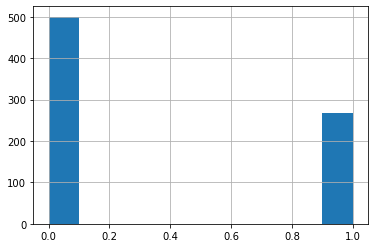

In [9]:
diabetes['diabetes'].hist()
plt.show()

Here's a description of each feature (from <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a>):
- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

We'll store the features in 'X' and the labels in 'y'. Our goal is to approximate the function mapping X to y:

<img src="assets/f_xy.png">

In [10]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [11]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

# Create training and test sets

After collecting the data, the first step is to set aside a test set. The data in the test set will not be used for anything else than the final test of our machine learning model's accuracy. Using the test set during model design is a huge no-no since this will give a biased performance estimate when evaluating our model on the test set (i.e. we'll overfit to the test data set). 

> We're not interested in how well our models perform on the training set, what we're really after is how well they generalize to unseen data. 

The test set is meant to simulate unseen data (and should therefore not be touched when constructing and tuning our models). 

<img width=50% src="assets/testsplit.png"> 

We'll randomly split off 25% of the data to be used as a test set:

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(The random state is set to ensure that we get the same random split every time the cell is executed)

We now have 576 instances for training, 192 for testing

In [15]:
len(X_train), len(X_test)

(576, 192)

# Training a classifier

We have a lot of choices when building our model, something we'll learn more about later the course. For now, let's use `SGDClassifier` as a "black box", without studying how it works behind the scenes (but feel free to read more about the model [here](http://scikit-learn.org/stable/modules/sgd.html)). Our focus now is on classification in general, not on specific models. 

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
?SGDClassifier

In [18]:
# Create an instance of the model:
sgd_clf = SGDClassifier(random_state=20)

In [19]:
# Train the model:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=20)

The model is now trained on the training data, and we can use it to make predictions for the test data:

In [20]:
y_pred = sgd_clf.predict(X_test)

Here are the 192 predictions:

In [21]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

Here are the 192 correct answers:

In [22]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

Let's put them next to each other and print out the first few:

In [23]:
list(zip(y_test, y_pred))[:10] # "Zip" the two above arrays and display the first 10

[(0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 0)]

We observe that the model is correct some times, incorrect others. 

> **But how good is the model, really?** 

We need ways to evaluate and validate models..

# Evaluating models / performance measures

First of all, when evaluating the performance of a model one should really ask "*What is the end goal for my system"?* We're supposed to create systems that are useful in some context, as part of a larger system, which typically has a higher-level goal that our system should aim to optimize. Perhaps it's worth sacrificing accuracy for speed, or not getting a lot of useless clicks that don't lead to sales?

However, we won't think about these broader context matters in these toy problems.

## Accuracy and different sorts of errors

For classification a common metric is accuracy: what fraction of our predictions were correct? 

But there are different kinds of errors in binary classification: if we classify something as belonging to the positive class we can either be correct (**true positive**) or incorrect (**false positive**). If we classify something as negative we can either be correct (**true negative**) or incorrect (**false negative**). 

What types of errors we care most about depends on the task: if we're for example diagnosing a treatable condition in patients we should do everything we can to reduce the rate of false negatives. While perhaps still keeping an eye on the false positive rate because a positive diagnosis could lead to invasive and extensive further testing for the patient.

In spam filtering we care most about not marking important emails as spam, i.e. we want a low false positive rate (non-spam marked as spam) even if it means a higher false negative rate (some spam emails ending up in our inbox). 

For computing accuracy, we can use the `accuracy_score` function from `sklearn.metrics`:

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.5416666666666666

The model makes the correct prediction approximately 54% of the time. 

## Validation set and model selection

We're now going to play around with different models and their "settings" (i.e. changeable parameters) to decide which model to use. This is called **model selection**.


During model selection it is very important to *not* base ones decisions on test set performance! Otherwise we'll have no way to produce an unbiased estimate of how well the final model will generalize to new data, as we've used information from our test set to design the model.

We can deal with this issue by splitting the training set into two: a data set used for training (still called the training set) and a data set for evaluating performance while trying out various possible models and settings, called a **validation set**.

We've seen this idea used earlier in the course, and we know how to do this using the `train_test_split` function.

<img src="assets/trainvaltestset.png" width="40%">

> **Your turn!**
- Split `(X_train, y_train)` into two parts: one for training, one for validation. You can call the new data sets and label sets `X_train_new, X_val, y_train_new, y_val`. Hint: Use the `train_test_split` function.
- Train your model again on the new training set, and compute its accuracy on the validation set using the `score` method (in the case of classifiers, this computes the `accuracy_score` automatically, as we did above): `model.score(X_val, y_val)` 
- Is the result good? What accuracy would a random guesser have?
- Play around with some of the parameters of `SGDClassifier` and try to improve the result on the validation set. Once you've found some parameters that seem good, test on the test set: `model.predict(X_test)` and `model.score(X_test, y_test)` (If you want to be thorough, use grid search to test parameter combinations). Note that as mentioned above, it is very important to not use the test data set until you've done all of the model selection work (selecting which model to use, what parameter settings it should have, and so on). Otherwise the models will be tuned on the test data set, and it will no longer give a realistic simulation of new data coming in, and therefore the score achieved on the test set will provide a biased generalization performance estimate.

## Cross-validation

Another frequently used way to do validation is *cross-validation*.

The idea is to randomly split the training set into several parts, so called *folds*. Say into K folds, for example. Then train a model K times, each time using a different fold for evaluation and training on the remaining K-1. The average score for the K runs is used to estimate the model's performance. 

This means that *each sample in the training set is part of the training set K-1 times and the evaluation set once*. 

<img src="assets/K-fold_cross_validation_EN.jpg"><br>
<span style="font-size:70%">Image from <a href="https://commons.wikimedia.org/wiki/File:K-fold_cross_validation_EN.jpg">Wikipedia</a></span>

An important advantage of this approach over the one above is that it doesn't waste as much training data. Unless you have plenty of data, cross-validation is the preferred method for estimating model performance.

Cross-validation also provides a more thorough test than splitting the data into a training set and a test set. The `train_test_split` procedure sets aside a fixed random subset of the data as a test set. If we're unlucky, all the difficult examples end up in the training set, while the test set contains only easy ones. That would lead to an overestimate of the true performance of our model.

Note: the special case of cross-validation where K is set to the number of data points in the training set is called *leave-one-out*. Each fold is then a single sample.

The result of this K-fold cross validation procedure is an array of K evaluation scores.

> We'll use the cross-validation approach in the rest of this notebook. 

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_scores = cross_val_score(sgd_clf, X_train, y_train, cv=5, 
                            scoring='accuracy', n_jobs=-1)

In [28]:
print(cv_scores)

[0.62068966 0.55652174 0.34782609 0.65217391 0.68695652]


In [29]:
cv_scores.mean()

0.5728335832083958

The mean accuracy of our model on the five folds is about 57.3%, which on the surface looks pretty good!

...but is it really? Remember that there were more non-diabetes instances than diabetes instances. 

In fact, there are in total 500 non-diabetes instances and 268 diabetes:

In [30]:
diabetes['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

Therefore, if we simply guessed that everyone belongs to the class non-diabetes, we would achieve an accuracy of...

In [31]:
y_dummy = [0,]*len(y_test) # This creates a list of 0 with the same length as `y_test`
accuracy_score(y_test, y_dummy)

0.640625

...64%! 

We're dealing with an **unbalanced dataset** (also called a *skewed dataset*). In such cases accuracy is typically not a very informative measure.

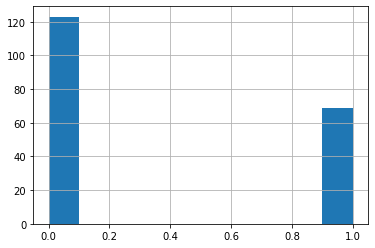

In [32]:
y_test.hist()
plt.show()

A model that's always predicting non-diabetes will have an accuracy of approximately 64%. That makes our model less impressive...

Luckily, there's a better way to evaluate the model than merely computing the accuracy!

> **Your turn:** Many machine learning models, like the `SGDClassifier`, perform better if the input data is properly scaled. Try using the `StandardScaler` in scikit-learn to standardize the training data. Then feed it through `cross_val_score`. You could also try the `MinMaxScaler`. 

> Hint: `from sklearn.preprocessing import StandardScaler, MinMaxScaler`. 

## Confusion matrix

A confusion matrix is a table summarizing the results from a classification model's predictions. In what way is the classifier "confused"? What errors does it tend to make?

The idea is to simply count the number of times instances of a certain class is classified as the various classes in your problem. In our case, how often the diabetes and non-diabetes are correctly classified, how often a non-diabetes is misclassified as diabetes and how often a diabetes is misclassified as a diabetes.

We need some produce some predictions to compare with the true classes. We can use `cross_val_predict`, which works similarly to `cross_val_score` except that it returns predictions based on all the K folds.

In [33]:
from sklearn.model_selection import cross_val_predict

In [34]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5, n_jobs=-1)

We now want to compare...

In [35]:
y_train_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

...to

In [36]:
np.array(y_train)

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

Here's the confusion matrix:

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[226 151]
 [ 95 104]]


In [39]:
from sklearn.metrics import plot_confusion_matrix

Let's use a small function for creating slightly nicer plots of confusion matrices, stored in the file `utils.py`: 

In [40]:
# If on colab, we need to download `utils.py` from the course repo
if colab:
    !wget https://raw.githubusercontent.com/alu042/DAT801/master/notebooks/utils.py

from utils import plot_confusion_matrix

<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

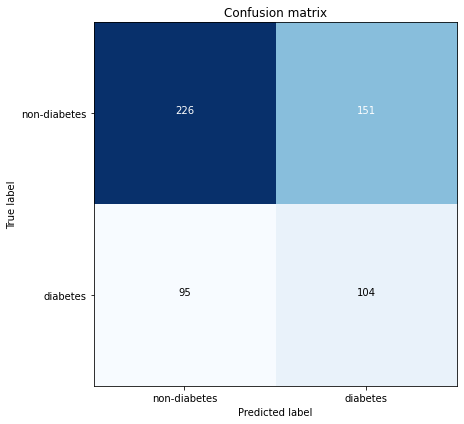

In [41]:
plot_confusion_matrix(cm, classes = ['non-diabetes', 'diabetes'])

Each row in the matrix represents a class: non-diabetes and diabetes. Each column represents a predicted class. 

The first row tells us that 226 instances were correctly classified as non-diabetes (**true negatives**). There were 151 instances classified as diabetes that where really non-diabetes (**false positives**).

The second row tells us that 95 diabetes instances were wrongly labelled as non-diabetes (**false negatives**), while the remaining 104 diabetes instances were correctly classified (**true positives**). 

> **Your turn!** How would the confusion matrix of a perfect classifier be?

These numbers tell us a lot about classifier performance. But sometimes it's useful to quantify (i.e. compute numbers) how much our classifier deviates from a perfect classifier.

## Precision, recall and specificity

For binary classification problems, i.e. where there are only two possible classes, we can use **precision**, **recall** and **specificity**.

It's helpful to first introduce some notation:

- P = All positive data points
- N = All negative data points
- TP = True positives
- FP = False positives
- TN = True negatives
- FN = False negatives

> **Your turn!** What are the values of these numbers for the classifier above?

The **precision** of a binary classifier is **the proportion of the positive predictions that were actually correct**. In other words, 

$$precision = \frac{\mbox{true positives}}{\mbox{positive predictions}} = \frac{TP}{TP + FP}.$$

> **Your turn!** What's the precision of the classifier above? What's the precision of a _perfect_ classifier? If a classifier has perfect precision, is it necessarily a good classifier?

The **recall** of a binary classifier is **the proportion of actual positives that were correctly identified**. In other words, 

$$recall = \frac{\mbox{true positives}}{\mbox{all actual positives}} = \frac{TP}{P} = \frac{TP}{TP+FN}$$

Recall is sometimes also called the **true positive rate**.

> **Your turn!** What's the recall of the classifier above? What's the recall of a _perfect_ classifier? If a classifier has perfect recall, is it necessarily a good classifier?

The **specificity** of a binary classifier is **the proportion of actual negatives that were correctly identified**. In other words,

$$specificity = \frac{\mbox{true negatives}}{\mbox{all actual negatives}} = \frac{TN}{TN + FP}$$

Specificity is sometimes also called the **true negative rate**.

> **Your turn!** What's the specificity of the classifier above? What's the specificity of a _perfect_ classifier? If a classifier has perfect specificity, is it necessarily a good classifier?

<img width=40% src="assets/Precisionrecall.png">

<span style=font-size:80%>Illustration from Wikipedia</span>

### Connection to the confusion matrix

We can use the connection between TP, FP, FN and TN and the confusion matrix to compute the precision, recall and specificity:

In [42]:
cm

array([[226, 151],
       [ 95, 104]])

In [43]:
# Here's a way to pick out elements of a two-dimensional array
cm[0][0]

226

In [44]:
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

In [45]:
tn, fp, fn, tp

(226, 151, 95, 104)

In [46]:
#..or slightly more conveniently:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(226, 151, 95, 104)

In [47]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)

In [48]:
print(f"Precision: {precision}\n Recall: {recall}\n Specificity: {specificity}")

Precision: 0.40784313725490196
 Recall: 0.5226130653266332
 Specificity: 0.5994694960212201


### In scikit-learn

Of course, scikit-learn has this functionality built-in

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
precision_score(y_train, y_train_pred)

0.40784313725490196

In [51]:
recall_score(y_train, y_train_pred)

0.5226130653266332

> **Your turn!** What is more important, high precision or high recall?

> **Your turn!** A question to ponder: How would you define precision and recall if you have more than two classes?

## $F_1$ score

Since you typically care about both precision and recall, it can sometimes make sense to combine them into one number (for example when comparing two classifiers). The **$F_1$ score** is one way, defined as a sort of average of precision and recall. Not the usual average, but what's called the *harmonic mean*:

$$F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$$

You may wonder why you would use the harmonic mean instead of the standard (arithmetic) mean. The main reason is that we want to output a low score for a classifier that has either very bad precision or very bad recall (i.e. one of them close to 0). Such classifiers should be punished by assigning them a very low score. 

For example, if the precision is 0.0001 and the recall is 1, the $F_1$ score will be close to 0, while the artihmetic mean would be (0.0001 + 1) / 2 ~ 0.5. 

> **Your turn!** Say you have two classifiers A and B, with

$$
\begin{align}
\mbox{precision}_A = 0.7,\quad &\mbox{recall}_A = 0.6 \\
\mbox{precision}_B = 0.3,\quad &\mbox{recall}_B = 1
\end{align}
$$

> What are the corresponding arithmetic means of the two models? What are their $F_1$ scores? You'll notice that model B's bad precision results in a lower $F_1$ compared to model A.

In [52]:
from sklearn.metrics import f1_score

In [53]:
f1_score(y_train, y_train_pred)

0.4581497797356828

An $F_1$ score of 1.0 means perfect precision *and* perfect recall (i.e. a perfect classifier).

> **Your turn!** Remember that I asked you to try to construct a better `SGDClassifier` model by normalizing the data before it is put into the model. If you haven't done so already, please try. Then run your predictions through the above set of evaluation methods.

Here's a solution (uncomment and run the below cell). Don't peek until you've tried yourself. :-) 

In [54]:
#if colab:
#    !wget https://raw.githubusercontent.com/alu042/DAT801/master/notebooks/solutions/2.0-sgd_normalized.py

In [60]:
# %load solutions/2.0-sgd_normalized.py

**NOTE:** If you're using Colab, copy the output of the above cell into a new code cell and run it. 

In [56]:
# If colab: paste the above output here:


We'll use the classifier trained on the normalized data in what follows:

In [61]:
sgd_clf = sgd_clf_std

X_train = X_train_std
X_test = X_test_std

## Precision/recall tradeoff

Importantly, **it's typically impossible to achieve both high precision and high recall simultaneously**. They are typically competing quantities: when one is high the other is low. Working to improve the precision often lowers the model's recall, and vice-versa. You have to trade one for the other.

Let's try to understand why

A classifier with perfect recall is easy to construct: just predict that everything is diabetes! Then there are no false negatives and the recall is 1.0. Perfect. Except, the precision will be rubbish.

To get high precision, make a classifier predict *one* instance as diabetes that you're very sure is correct, and the rest as non-diabetes. Then the number of false positives will likely be 0, and the precision 1.0. The recall will however be really bad as there will be many false negatives. 

We can see this principle in action for our `SGDClassifier`. But we'll have to discuss what's going on behind the scenes when we ran `sgd_cl.fit` on our training data...

_Fitting_ or _training_ the `SGDClassifier` means finding a _hyperplane_, or a _boundary_, in the data space that separates the diabetes instances from the non-diabetes as much as possible. 

When feeding `SGDClassifer` a data point it decides whether it is a diabetes or a non-diabetes based on the _distance_ from the data point to this hyperplane. By default, if the data point has a negative distance to the plane, the model predicts that it's from the negative class (a non-diabetes in our case). If the distance is positive, it's predicted to be from the positive class (a diabetes instances). In other words, the **decision threshold** is set to 0 by default. 

Furthermore, the distance from the data point to the hyperplane can be interpreted as how _certain_ the model is about its prediction. The larger the distance, the more certain the model. 

***Where you set the threshold makes a big difference***.

Let's do some experiments on an example to investigate further. We'll use the first instance in the test data set:

In [62]:
# Features
X_test[0]

array([ 0.6839137 , -0.70579433, -0.625833  ,  0.81143325,  0.94414993,
        0.26501306, -0.11390738,  0.87654579])

In [63]:
# Label
y_test.iloc[0]

0

`SGDClassifier` has a method that computes the distance of a data point from the hyperplane:

In [64]:
y_example_score = sgd_clf.decision_function([X_test[0]])

In [65]:
print(y_example_score)

[-1.75669501]


Let's play with the threshold:

In [66]:
threshold = 0
y_example_pred = (y_example_score > threshold)
print(f"Is it a diabetes instance? {y_example_pred}")

Is it a diabetes instance? [False]


In [67]:
threshold = -10
y_example_pred = (y_example_score > threshold)
print(f"Is it a diabetes instance? {y_example_pred}")

Is it a diabetes instance? [ True]


You can see that increasing the threshold for classifying something as diabetes makes the model less likely to do so. *This increases the precision of the classifier, but reduces its recall.* Decreasing the threshold has the opposite effect: higher recall, lower precision.

Let's plot this.

First we compute the decision function score for all the training data:

In [68]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=2, method='decision_function')

We get 576 scores, one for each training example:

In [69]:
y_scores.shape

(576,)

Now, let's compute and plot the precisions and recalls for various thresholds:

In [70]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

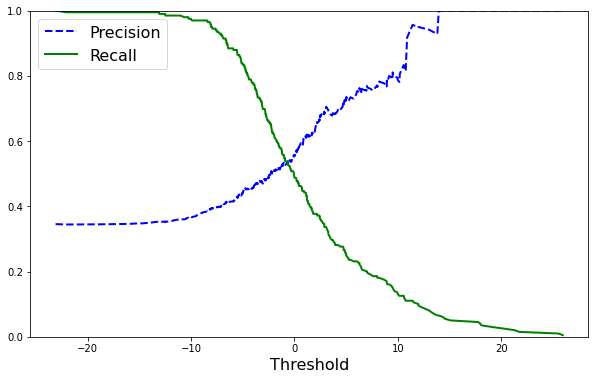

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Using such plots it's possible to select the threshold value that gives the best precision/recall tradeoff for your task.

Are false negatives very bad (like in medical diagnosis)? Select a low threshold to get high recall and OK precision. Are false positives especially costly (like in spam detection)? Go for a threshold that gives you high precison and OK recall.

Note that it's very easy to create a classifier with any precision you want, as long as you don't care about recall. You just have to select a suitable threshold. 

For example

In [72]:
y_train_pred_precise = (y_scores > 18)
precision_score(y_train, y_train_pred_precise)

1.0

In [73]:
recall_score(y_train, y_train_pred_precise)

0.035175879396984924

> If someone says "let's reach 90% precision!", you should ask, "at what recall?" &mdash; Aurelien Geron

As the F1 score is a kind of mean between precision and recall, it can be used to catch models who trades off a lot of precision for high recall or vice versa:

In [74]:
f1_score(y_train, (y_scores > 0))

0.5187165775401069

In [75]:
f1_score(y_train, (y_scores > 18))

0.06796116504854369

In [76]:
f1_score(y_train, (y_scores < -10))

0.04838709677419355

## Comparing classifiers

The metrics we've discussed above gives us ways to compare classifiers. We can for example use the F1 score. Computing such numbers are often more convenient than looking at curves, and also enables automatic model selection.

We can try this out by creating another model to solve our classification task: a random forest:

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Get predictions
y_train_preds_rf = cross_val_predict(forest_clf, X_train, y_train, cv=3)


In [78]:
y_train_preds_rf.shape

(576,)

We get:

In [79]:
print(f"F1 score for RandomForestClassifer: {f1_score(y_train, y_train_preds_rf)}\n")
print(f"F1 score for SGDClassifier: {f1_score(y_train, y_train_std_pred)}")

F1 score for RandomForestClassifer: 0.6284153005464481

F1 score for SGDClassifier: 0.5728395061728394


This leads us to prefer the Random Forest classifier (unless of course other considerations besides what's captured by the F1 score pulls in the direction of the SGDClassifier...).

In [80]:
print(confusion_matrix(y_train, y_train_preds_rf))

[[325  52]
 [ 84 115]]


In [81]:
print(confusion_matrix(y_train, y_train_std_pred))

[[287  90]
 [ 83 116]]


We also see that the confusion matrix for the random forest is in general better than for the SGD classifier. But note also that the SGDClassifier actually manages to detect one more true positives than the random forest classifier.

Note also that the random forest is much slower in producing its predicitons:

In [82]:
%%time 
cross_val_score(forest_clf, X_train, y_train, cv=3).mean()

CPU times: user 449 ms, sys: 0 ns, total: 449 ms
Wall time: 448 ms


0.763888888888889

In [83]:
%%time 
cross_val_score(sgd_clf, X_train, y_train, cv=3).mean()

CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 9.99 ms


0.71875

Such findings may lead one to actually prefer a model that is weaker in some respects, depending on practical considerations about the "bigger picture". What the model is supposed to be used for, and as part of what pipeline or workflow.  

# Final test of classifiers

After these experiments, we can make a final performance check against the test data. This will provide our estimate of the model's generalization performance.

In [84]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test, y_test)

0.7395833333333334

**Your turn!** Plot the confusion matrix for the test data and the Random Forest predictions. Compute its precision, recall, specificity, and F1 score.

# Summary so far

Some of the things we've learned so far:

- How to train a binary classifier
- Choosing appropriate metrics for the task
- Evaluating classifiers using cross-validation
- Selecting appropriate precision/recall tradeoffs
- Comparing models using F1 scores

# Next

In the next notebook, we'll take a look at multiclass classification.